# Round 2

In [80]:
import pandas as pd
import numpy as np

In [81]:
pd.set_option('display.max_columns', None)

In [82]:
filemkt = pd.read_csv('marketing_customer_analysis.csv')
filemkt

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [83]:
#Show the dataframe shape.
filemkt.shape

(10910, 26)

In [84]:
filemkt

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [85]:
filemkt = filemkt.drop(['Unnamed: 0'],axis=1)

In [86]:
#Standardize header names - Put every name in lower case
colu = []
for colname in filemkt.columns:
    colu.append(colname.lower())
filemkt.columns = colu
filemkt

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [165]:
filemkt = filemkt.rename(columns={'employmentstatus':'employment status','effective to date':'date'})

In [88]:
filemkt.shape

(10910, 25)

In [89]:
filemkt.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [90]:
#Which columns are numerical?
filemkt._get_numeric_data()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [168]:
#Which columns are categorical?
filemkt.select_dtypes(['object']) 

,customer,state,response,coverage,education,date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
10376,AA10041,California,No,Basic,High School or Below,2/2/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,NaN,NaN,A
8731,AA10041,California,No,Basic,High School or Below,2/2/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize,A
3960,AA10041,NaN,NaN,Basic,High School or Below,2/2/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize,A
432,AA11235,Nevada,No,Basic,Bachelor,1/28/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Medsize,NaN
6044,AA11235,Nevada,No,Basic,Bachelor,1/28/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,ZZ83340,Oregon,No,Basic,Doctor,2/4/11,Employed,F,Urban,Married,Personal Auto,Personal L1,Offer3,Branch,Two-Door Car,Medsize,NaN
6443,ZZ89380,Oregon,No,Extended,Bachelor,1/10/11,Employed,F,Rural,Married,Special Auto,Special L1,Offer2,Call Center,Two-Door Car,Large,A
3754,ZZ91716,California,No,Extended,Bachelor,1/22/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Small,NaN
9554,ZZ91716,California,No,Extended,Bachelor,1/22/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Small,NaN


In [169]:
#Check and deal with NaN values.
filemkt.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'date', 'employment status', 'gender', 'income',
       'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [167]:
filemkt.isnull().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
date                                0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [170]:
filemkt.sort_values("customer", inplace = True)
filemkt

,customer,state,customer lifetime value,response,coverage,education,date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
10376,AA10041,California,7901.744238,No,Basic,High School or Below,2/2/11,Unemployed,M,0,Suburban,Single,113,35.0,83,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,NaN,NaN,A
8731,AA10041,California,7901.744238,No,Basic,High School or Below,2/2/11,Unemployed,M,0,Suburban,Single,113,35.0,83,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize,A
3960,AA10041,NaN,7901.744238,NaN,Basic,High School or Below,2/2/11,Unemployed,M,0,Suburban,Single,113,35.0,83,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize,A
432,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167,Suburban,Married,73,NaN,99,NaN,1,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize,NaN
6044,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167,Suburban,Married,73,0.0,99,3.0,1,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,ZZ83340,Oregon,5508.315536,No,Basic,Doctor,2/4/11,Employed,F,96021,Urban,Married,68,5.0,30,0.0,5,Personal Auto,Personal L1,Offer3,Branch,315.004602,Two-Door Car,Medsize,NaN
6443,ZZ89380,Oregon,3196.578455,No,Extended,Bachelor,1/10/11,Employed,F,62815,Rural,Married,80,14.0,84,0.0,1,Special Auto,Special L1,Offer2,Call Center,47.061469,Two-Door Car,Large,A
9554,ZZ91716,California,3256.766388,No,Extended,Bachelor,1/22/11,Unemployed,F,0,Suburban,Married,89,17.0,56,0.0,1,Personal Auto,Personal L3,Offer2,Web,491.755368,Four-Door Car,Small,NaN
3754,ZZ91716,California,3256.766388,No,Extended,Bachelor,1/22/11,Unemployed,F,0,Suburban,Married,89,NaN,56,NaN,1,Personal Auto,Personal L3,Offer2,Web,491.755368,Four-Door Car,Small,NaN


In [171]:
# mode for state
#filemkt.most_common('state') 

#filemkt.duplicated('customer').sum

filemkt.duplicated('customer')

10376    False
8731      True
3960      True
432      False
6044      True
         ...  
7250     False
6443     False
9554     False
3754      True
10609    False
Length: 10910, dtype: bool

In [172]:
dupli = filemkt[filemkt.duplicated('customer',keep=False)==True]   # keep=false - default setting will show the duplicates after the original (so not the original) this makes it show
dupli

,customer,state,customer lifetime value,response,coverage,education,date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
10376,AA10041,California,7901.744238,No,Basic,High School or Below,2/2/11,Unemployed,M,0,Suburban,Single,113,35.0,83,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,NaN,NaN,A
8731,AA10041,California,7901.744238,No,Basic,High School or Below,2/2/11,Unemployed,M,0,Suburban,Single,113,35.0,83,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize,A
3960,AA10041,NaN,7901.744238,NaN,Basic,High School or Below,2/2/11,Unemployed,M,0,Suburban,Single,113,35.0,83,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize,A
432,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167,Suburban,Married,73,NaN,99,NaN,1,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize,NaN
6044,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167,Suburban,Married,73,0.0,99,3.0,1,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,ZZ49347,Oregon,2592.437797,Yes,Basic,High School or Below,1/2/11,Employed,M,72421,Suburban,Married,65,8.0,23,0.0,1,Personal Auto,Personal L3,Offer2,Call Center,312.000000,NaN,NaN,A
3218,ZZ69693,California,2449.580048,No,Basic,High School or Below,1/23/11,Unemployed,M,0,Suburban,Single,69,20.0,44,0.0,1,Corporate Auto,Corporate L3,Offer3,Branch,496.800000,Four-Door Car,Large,A
1582,ZZ69693,California,2449.580048,No,Basic,High School or Below,1/23/11,Unemployed,M,0,Suburban,Single,69,20.0,44,0.0,1,Corporate Auto,Corporate L3,Offer3,Branch,496.800000,NaN,NaN,NaN
9554,ZZ91716,California,3256.766388,No,Extended,Bachelor,1/22/11,Unemployed,F,0,Suburban,Married,89,17.0,56,0.0,1,Personal Auto,Personal L3,Offer2,Web,491.755368,Four-Door Car,Small,NaN


In [173]:
dupli[dupli['customer']=='VQ78876']

,customer,state,customer lifetime value,response,coverage,education,date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
10890,VQ78876,Oregon,4660.399573,No,Basic,Bachelor,2/3/11,Employed,F,89834,Rural,Married,116,24.0,11,0.0,1,Corporate Auto,Corporate L3,Offer1,Branch,43.15595,NaN,NaN,NaN
7470,VQ78876,Oregon,4660.399573,No,Basic,Bachelor,2/3/11,Employed,F,89834,Rural,Married,116,24.0,11,0.0,1,Corporate Auto,Corporate L3,Offer1,Branch,43.15595,SUV,Medsize,A


In [174]:
dupli['customer']

10376    AA10041
8731     AA10041
3960     AA10041
432      AA11235
6044     AA11235
          ...   
716      ZZ49347
3218     ZZ69693
1582     ZZ69693
9554     ZZ91716
3754     ZZ91716
Name: customer, Length: 3292, dtype: object

In [175]:
filemkt[filemkt.duplicated('customer',keep=False)==True]

,customer,state,customer lifetime value,response,coverage,education,date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
10376,AA10041,California,7901.744238,No,Basic,High School or Below,2/2/11,Unemployed,M,0,Suburban,Single,113,35.0,83,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,NaN,NaN,A
8731,AA10041,California,7901.744238,No,Basic,High School or Below,2/2/11,Unemployed,M,0,Suburban,Single,113,35.0,83,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize,A
3960,AA10041,NaN,7901.744238,NaN,Basic,High School or Below,2/2/11,Unemployed,M,0,Suburban,Single,113,35.0,83,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize,A
432,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167,Suburban,Married,73,NaN,99,NaN,1,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize,NaN
6044,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167,Suburban,Married,73,0.0,99,3.0,1,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,ZZ49347,Oregon,2592.437797,Yes,Basic,High School or Below,1/2/11,Employed,M,72421,Suburban,Married,65,8.0,23,0.0,1,Personal Auto,Personal L3,Offer2,Call Center,312.000000,NaN,NaN,A
3218,ZZ69693,California,2449.580048,No,Basic,High School or Below,1/23/11,Unemployed,M,0,Suburban,Single,69,20.0,44,0.0,1,Corporate Auto,Corporate L3,Offer3,Branch,496.800000,Four-Door Car,Large,A
1582,ZZ69693,California,2449.580048,No,Basic,High School or Below,1/23/11,Unemployed,M,0,Suburban,Single,69,20.0,44,0.0,1,Corporate Auto,Corporate L3,Offer3,Branch,496.800000,NaN,NaN,NaN
9554,ZZ91716,California,3256.766388,No,Extended,Bachelor,1/22/11,Unemployed,F,0,Suburban,Married,89,17.0,56,0.0,1,Personal Auto,Personal L3,Offer2,Web,491.755368,Four-Door Car,Small,NaN


In [180]:
#df = filemkt.groupby('customer', as_index=False).combine({'customer' : 'first', 'gender' : '' .join})
#df = filemkt.groupby(['customer','state']).mean()


datamkt = filemkt.groupby(['customer','state','gender', 'response', 'coverage', 'education', 'date', 'employment status','location code','marital status','policy type','policy','renew offer type','sales channel','vehicle class','vehicle size']).mean().reset_index()
#datamkt = filemkt.groupby([all]).mean().reset_index()
datamkt

# I tried grouping rows together that had equal values, but had problems with the column 'vehicle type', it reduced my rows to half.
# For practical reason I decided to continue without it; maybe I´ll return and try to fix it.


#'customer', 'state', 'response', 'coverage', 'education', 'effective to date', 'employment status', 'gender', 'location code','marital status','policy type','policy','renew offer type','sales channel','vehicle class','vehicle size','vehicle type'

,customer,state,gender,response,coverage,education,date,employment status,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,AA10041,California,M,No,Basic,High School or Below,2/2/11,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize,7901.744238,0.0,113.0,35.0,83.0,0.0,5.0,1258.327804
1,AA11235,Nevada,F,No,Basic,Bachelor,1/28/11,Medical Leave,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Medsize,2568.843396,11167.0,73.0,0.0,99.0,3.0,1.0,350.400000
2,AA16582,Washington,M,Yes,Basic,Bachelor,1/26/11,Medical Leave,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,24127.504020,14072.0,71.0,13.0,3.0,0.0,2.0,511.200000
3,AA30683,California,M,No,Premium,Bachelor,1/15/11,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Web,Four-Door Car,Medsize,6595.101921,0.0,105.0,2.0,38.0,2.0,7.0,847.717402
4,AA34092,California,M,No,Extended,College,2/11/11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Web,Luxury SUV,Medsize,28799.954150,33635.0,240.0,1.0,23.0,0.0,2.0,1152.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,ZZ77357,Nevada,M,No,Basic,High School or Below,1/9/11,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Agent,Two-Door Car,Medsize,4468.220900,0.0,65.0,16.0,61.0,0.0,9.0,468.000000
9130,ZZ83340,Oregon,F,No,Basic,Doctor,2/4/11,Employed,Urban,Married,Personal Auto,Personal L1,Offer3,Branch,Two-Door Car,Medsize,5508.315536,96021.0,68.0,5.0,30.0,0.0,5.0,315.004602
9131,ZZ89380,Oregon,F,No,Extended,Bachelor,1/10/11,Employed,Rural,Married,Special Auto,Special L1,Offer2,Call Center,Two-Door Car,Large,3196.578455,62815.0,80.0,14.0,84.0,0.0,1.0,47.061469
9132,ZZ91716,California,F,No,Extended,Bachelor,1/22/11,Unemployed,Suburban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Small,3256.766388,0.0,89.0,17.0,56.0,0.0,1.0,491.755368


In [181]:
datamkt.isnull().sum()

customer                         0
state                            0
gender                           0
response                         0
coverage                         0
education                        0
date                             0
employment status                0
location code                    0
marital status                   0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
vehicle class                    0
vehicle size                     0
customer lifetime value          0
income                           0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
total claim amount               0
dtype: int64

In [182]:
datamkt

,customer,state,gender,response,coverage,education,date,employment status,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,AA10041,California,M,No,Basic,High School or Below,2/2/11,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize,7901.744238,0.0,113.0,35.0,83.0,0.0,5.0,1258.327804
1,AA11235,Nevada,F,No,Basic,Bachelor,1/28/11,Medical Leave,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Medsize,2568.843396,11167.0,73.0,0.0,99.0,3.0,1.0,350.400000
2,AA16582,Washington,M,Yes,Basic,Bachelor,1/26/11,Medical Leave,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,24127.504020,14072.0,71.0,13.0,3.0,0.0,2.0,511.200000
3,AA30683,California,M,No,Premium,Bachelor,1/15/11,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Web,Four-Door Car,Medsize,6595.101921,0.0,105.0,2.0,38.0,2.0,7.0,847.717402
4,AA34092,California,M,No,Extended,College,2/11/11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Web,Luxury SUV,Medsize,28799.954150,33635.0,240.0,1.0,23.0,0.0,2.0,1152.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,ZZ77357,Nevada,M,No,Basic,High School or Below,1/9/11,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Agent,Two-Door Car,Medsize,4468.220900,0.0,65.0,16.0,61.0,0.0,9.0,468.000000
9130,ZZ83340,Oregon,F,No,Basic,Doctor,2/4/11,Employed,Urban,Married,Personal Auto,Personal L1,Offer3,Branch,Two-Door Car,Medsize,5508.315536,96021.0,68.0,5.0,30.0,0.0,5.0,315.004602
9131,ZZ89380,Oregon,F,No,Extended,Bachelor,1/10/11,Employed,Rural,Married,Special Auto,Special L1,Offer2,Call Center,Two-Door Car,Large,3196.578455,62815.0,80.0,14.0,84.0,0.0,1.0,47.061469
9132,ZZ91716,California,F,No,Extended,Bachelor,1/22/11,Unemployed,Suburban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Small,3256.766388,0.0,89.0,17.0,56.0,0.0,1.0,491.755368


In [184]:
# Datetime format - Extract the months from the dataset and store in a separate column.
#Then filter the data to show only the information for the first quarter , ie. January, February and March.
#Hint: If data from March does not exist, consider only January and February.

datamkt['date'] = pd.to_datetime(datamkt['date'])
datamkt

,customer,state,gender,response,coverage,education,date,employment status,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,AA10041,California,M,No,Basic,High School or Below,2011-02-02,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize,7901.744238,0.0,113.0,35.0,83.0,0.0,5.0,1258.327804
1,AA11235,Nevada,F,No,Basic,Bachelor,2011-01-28,Medical Leave,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Medsize,2568.843396,11167.0,73.0,0.0,99.0,3.0,1.0,350.400000
2,AA16582,Washington,M,Yes,Basic,Bachelor,2011-01-26,Medical Leave,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,24127.504020,14072.0,71.0,13.0,3.0,0.0,2.0,511.200000
3,AA30683,California,M,No,Premium,Bachelor,2011-01-15,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Web,Four-Door Car,Medsize,6595.101921,0.0,105.0,2.0,38.0,2.0,7.0,847.717402
4,AA34092,California,M,No,Extended,College,2011-02-11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Web,Luxury SUV,Medsize,28799.954150,33635.0,240.0,1.0,23.0,0.0,2.0,1152.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,ZZ77357,Nevada,M,No,Basic,High School or Below,2011-01-09,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Agent,Two-Door Car,Medsize,4468.220900,0.0,65.0,16.0,61.0,0.0,9.0,468.000000
9130,ZZ83340,Oregon,F,No,Basic,Doctor,2011-02-04,Employed,Urban,Married,Personal Auto,Personal L1,Offer3,Branch,Two-Door Car,Medsize,5508.315536,96021.0,68.0,5.0,30.0,0.0,5.0,315.004602
9131,ZZ89380,Oregon,F,No,Extended,Bachelor,2011-01-10,Employed,Rural,Married,Special Auto,Special L1,Offer2,Call Center,Two-Door Car,Large,3196.578455,62815.0,80.0,14.0,84.0,0.0,1.0,47.061469
9132,ZZ91716,California,F,No,Extended,Bachelor,2011-01-22,Unemployed,Suburban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Small,3256.766388,0.0,89.0,17.0,56.0,0.0,1.0,491.755368


In [202]:
#to extract month and year
#datamkt ['mm'] = pd.to_datetime(datamkt['date']).dt.month
#datamkt['yyyy'] = pd.to_datetime(datamkt['date']).dt.year
#datamkt = datamkt.drop(['yyyy'],axis=1) # used this because I accidentally incerted 'yyyy' and 'mm' column

#but we just need month

datamkt ['month'] = pd.to_datetime(datamkt['date']).dt.month
datamkt

,customer,state,gender,response,coverage,education,date,employment status,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,AA10041,California,M,No,Basic,High School or Below,2011-02-02,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize,7901.744238,0.0,113.0,35.0,83.0,0.0,5.0,1258.327804,2
1,AA11235,Nevada,F,No,Basic,Bachelor,2011-01-28,Medical Leave,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Medsize,2568.843396,11167.0,73.0,0.0,99.0,3.0,1.0,350.400000,1
2,AA16582,Washington,M,Yes,Basic,Bachelor,2011-01-26,Medical Leave,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,24127.504020,14072.0,71.0,13.0,3.0,0.0,2.0,511.200000,1
3,AA30683,California,M,No,Premium,Bachelor,2011-01-15,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Web,Four-Door Car,Medsize,6595.101921,0.0,105.0,2.0,38.0,2.0,7.0,847.717402,1
4,AA34092,California,M,No,Extended,College,2011-02-11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Web,Luxury SUV,Medsize,28799.954150,33635.0,240.0,1.0,23.0,0.0,2.0,1152.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,ZZ77357,Nevada,M,No,Basic,High School or Below,2011-01-09,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Agent,Two-Door Car,Medsize,4468.220900,0.0,65.0,16.0,61.0,0.0,9.0,468.000000,1
9130,ZZ83340,Oregon,F,No,Basic,Doctor,2011-02-04,Employed,Urban,Married,Personal Auto,Personal L1,Offer3,Branch,Two-Door Car,Medsize,5508.315536,96021.0,68.0,5.0,30.0,0.0,5.0,315.004602,2
9131,ZZ89380,Oregon,F,No,Extended,Bachelor,2011-01-10,Employed,Rural,Married,Special Auto,Special L1,Offer2,Call Center,Two-Door Car,Large,3196.578455,62815.0,80.0,14.0,84.0,0.0,1.0,47.061469,1
9132,ZZ91716,California,F,No,Extended,Bachelor,2011-01-22,Unemployed,Suburban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Small,3256.766388,0.0,89.0,17.0,56.0,0.0,1.0,491.755368,1


In [203]:
#to print columns for month and year
#datamkt['yyyy'].astype(str) + '-'+ datamkt['mm'].astype(str)   # found this but not sure what it does, it didn´t seem to make any changes for me

In [206]:
datamkt[datamkt['month']<4]

,customer,state,gender,response,coverage,education,date,employment status,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,AA10041,California,M,No,Basic,High School or Below,2011-02-02,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize,7901.744238,0.0,113.0,35.0,83.0,0.0,5.0,1258.327804,2
1,AA11235,Nevada,F,No,Basic,Bachelor,2011-01-28,Medical Leave,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Medsize,2568.843396,11167.0,73.0,0.0,99.0,3.0,1.0,350.400000,1
2,AA16582,Washington,M,Yes,Basic,Bachelor,2011-01-26,Medical Leave,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,24127.504020,14072.0,71.0,13.0,3.0,0.0,2.0,511.200000,1
3,AA30683,California,M,No,Premium,Bachelor,2011-01-15,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Web,Four-Door Car,Medsize,6595.101921,0.0,105.0,2.0,38.0,2.0,7.0,847.717402,1
4,AA34092,California,M,No,Extended,College,2011-02-11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Web,Luxury SUV,Medsize,28799.954150,33635.0,240.0,1.0,23.0,0.0,2.0,1152.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,ZZ77357,Nevada,M,No,Basic,High School or Below,2011-01-09,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Agent,Two-Door Car,Medsize,4468.220900,0.0,65.0,16.0,61.0,0.0,9.0,468.000000,1
9130,ZZ83340,Oregon,F,No,Basic,Doctor,2011-02-04,Employed,Urban,Married,Personal Auto,Personal L1,Offer3,Branch,Two-Door Car,Medsize,5508.315536,96021.0,68.0,5.0,30.0,0.0,5.0,315.004602,2
9131,ZZ89380,Oregon,F,No,Extended,Bachelor,2011-01-10,Employed,Rural,Married,Special Auto,Special L1,Offer2,Call Center,Two-Door Car,Large,3196.578455,62815.0,80.0,14.0,84.0,0.0,1.0,47.061469,1
9132,ZZ91716,California,F,No,Extended,Bachelor,2011-01-22,Unemployed,Suburban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Small,3256.766388,0.0,89.0,17.0,56.0,0.0,1.0,491.755368,1


In [ ]:
# Had no time for the Bonus
# Put all the previously mentioned data transformations into a function

# Finally starting Round 3

In [208]:
#EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
#Show DataFrame info.
datamkt

,customer,state,gender,response,coverage,education,date,employment status,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,AA10041,California,M,No,Basic,High School or Below,2011-02-02,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize,7901.744238,0.0,113.0,35.0,83.0,0.0,5.0,1258.327804,2
1,AA11235,Nevada,F,No,Basic,Bachelor,2011-01-28,Medical Leave,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Medsize,2568.843396,11167.0,73.0,0.0,99.0,3.0,1.0,350.400000,1
2,AA16582,Washington,M,Yes,Basic,Bachelor,2011-01-26,Medical Leave,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,24127.504020,14072.0,71.0,13.0,3.0,0.0,2.0,511.200000,1
3,AA30683,California,M,No,Premium,Bachelor,2011-01-15,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Web,Four-Door Car,Medsize,6595.101921,0.0,105.0,2.0,38.0,2.0,7.0,847.717402,1
4,AA34092,California,M,No,Extended,College,2011-02-11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Web,Luxury SUV,Medsize,28799.954150,33635.0,240.0,1.0,23.0,0.0,2.0,1152.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,ZZ77357,Nevada,M,No,Basic,High School or Below,2011-01-09,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Agent,Two-Door Car,Medsize,4468.220900,0.0,65.0,16.0,61.0,0.0,9.0,468.000000,1
9130,ZZ83340,Oregon,F,No,Basic,Doctor,2011-02-04,Employed,Urban,Married,Personal Auto,Personal L1,Offer3,Branch,Two-Door Car,Medsize,5508.315536,96021.0,68.0,5.0,30.0,0.0,5.0,315.004602,2
9131,ZZ89380,Oregon,F,No,Extended,Bachelor,2011-01-10,Employed,Rural,Married,Special Auto,Special L1,Offer2,Call Center,Two-Door Car,Large,3196.578455,62815.0,80.0,14.0,84.0,0.0,1.0,47.061469,1
9132,ZZ91716,California,F,No,Extended,Bachelor,2011-01-22,Unemployed,Suburban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Small,3256.766388,0.0,89.0,17.0,56.0,0.0,1.0,491.755368,1


In [ ]:
#Describe DataFrame.

# This dataframe is the information obtained from and internal database of a Car insurance company (probably).
# It contains (cleaned) 9134 rows and 25 columns with categorical and numerical values

In [213]:
datamkt['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is a Python data visualization library based on matplotlib
%matplotlib inline

<AxesSubplot:>

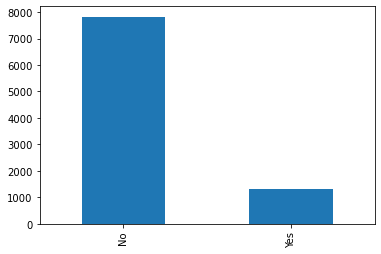

In [247]:
#Show a plot of the total number of responses.
datamkt['response'].value_counts().plot.bar()

In [268]:
#Show a plot of the response rate by the sales channel.

#epic fail

#datamkt['positive response'] = datamkt['response']=='Yes'

datamkt['response number'] = datamkt['response'].map({'Yes':1 ,'No':0})
datamkt

datamkt['sales'] = datamkt['response'].map({'Yes':1 ,'No':0})
datamkt

#first create a readable data (I did it through a boolean; could have also been a number) of the string response

,customer,state,gender,response,coverage,education,date,employment status,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,positive response,response number
0,AA10041,California,M,No,Basic,High School or Below,2011-02-02,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize,7901.744238,0.0,113.0,35.0,83.0,0.0,5.0,1258.327804,2,False,0
1,AA11235,Nevada,F,No,Basic,Bachelor,2011-01-28,Medical Leave,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Medsize,2568.843396,11167.0,73.0,0.0,99.0,3.0,1.0,350.400000,1,False,0
2,AA16582,Washington,M,Yes,Basic,Bachelor,2011-01-26,Medical Leave,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,24127.504020,14072.0,71.0,13.0,3.0,0.0,2.0,511.200000,1,True,1
3,AA30683,California,M,No,Premium,Bachelor,2011-01-15,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer1,Web,Four-Door Car,Medsize,6595.101921,0.0,105.0,2.0,38.0,2.0,7.0,847.717402,1,False,0
4,AA34092,California,M,No,Extended,College,2011-02-11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Web,Luxury SUV,Medsize,28799.954150,33635.0,240.0,1.0,23.0,0.0,2.0,1152.000000,2,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,ZZ77357,Nevada,M,No,Basic,High School or Below,2011-01-09,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Agent,Two-Door Car,Medsize,4468.220900,0.0,65.0,16.0,61.0,0.0,9.0,468.000000,1,False,0
9130,ZZ83340,Oregon,F,No,Basic,Doctor,2011-02-04,Employed,Urban,Married,Personal Auto,Personal L1,Offer3,Branch,Two-Door Car,Medsize,5508.315536,96021.0,68.0,5.0,30.0,0.0,5.0,315.004602,2,False,0
9131,ZZ89380,Oregon,F,No,Extended,Bachelor,2011-01-10,Employed,Rural,Married,Special Auto,Special L1,Offer2,Call Center,Two-Door Car,Large,3196.578455,62815.0,80.0,14.0,84.0,0.0,1.0,47.061469,1,False,0
9132,ZZ91716,California,F,No,Extended,Bachelor,2011-01-22,Unemployed,Suburban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Small,3256.766388,0.0,89.0,17.0,56.0,0.0,1.0,491.755368,1,False,0


In [271]:
sns.boxplot(y="response number", x="sales channel", datamkt=datamkt)
plt.show()

ValueError: Could not interpret input 'sales channel'

In [274]:
datamkt['sales channel'].unique()

array(['Call Center', 'Branch', 'Agent', 'Web'], dtype=object)

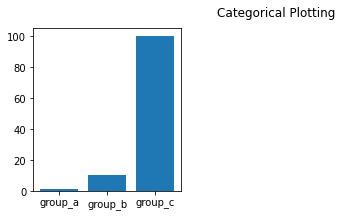

In [289]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

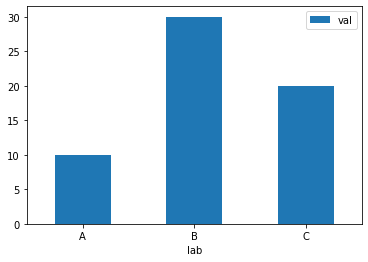

In [290]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [295]:
comparison1 = pd.DataFrame({datamkt['sales channel':[]], datamkt['sales':[]]})
compa = comparison1.plot.bar(x='sales channel',y='sales',rot=0)

TypeError: cannot do slice indexing on RangeIndex with these indexers [sales channel] of type str

In [238]:
#Show a plot of the response rate by the total claim amount.

#epic fail

In [ ]:
#Show a plot of the response rate by income.

#epic fail